In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd

wdc_bloom_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/data/washingtondc.csv")

In [25]:
wdc_weather_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/washington_reagan_national_airport.csv")

In [26]:
wdc_bloom_data.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,washingtondc,38.88535,-77.038628,0,1921,1921-03-20,79
1,washingtondc,38.88535,-77.038628,0,1922,1922-04-07,97
2,washingtondc,38.88535,-77.038628,0,1923,1923-04-09,99
3,washingtondc,38.88535,-77.038628,0,1924,1924-04-13,104
4,washingtondc,38.88535,-77.038628,0,1925,1925-03-27,86


In [27]:
wdc_weather_df = wdc_weather_data.drop(wdc_weather_data.columns[0], axis=1).reset_index()
header = wdc_weather_df.iloc[0]
wdc_weather_df = wdc_weather_df[1:]
wdc_weather_df.columns = header
wdc_weather_df = wdc_weather_df.reset_index(drop=True)

In [28]:
wdc_weather_df.head()

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches)
0,1945-07-01,NaN,99,76,0.34,0.0
1,1945-07-02,NaN,93,70,0.93,0.0
2,1945-07-03,NaN,82,65,0.00,0.0
3,1945-07-04,NaN,83,65,0.00,0.0
4,1945-07-05,NaN,85,70,0.43,0.0


In [29]:
# USA
# Winter: Dec 1 - Feb 28
# Spring: March 1 - May 31
# Summer: June 1 - August 31
# Autumn: September 1 - November 30

# function to find season from month
def find_season(date):
  season_month = {
      '12':'Winter-EOY', '01':'Winter-BOY', '02':'Winter-BOY',  # end-of-year winter and beginning-of-year winter
      '03':'Spring', '04':'Spring', '05':'Spring',
      '06':'Summer', '07':'Summer', '08':'Summer',
      '09':'Autumn', '10':'Autumn', '11':'Autumn'}
  return season_month.get(date[5:-3])

# applys season function
wdc_weather_df["season"] = wdc_weather_df["Date"].astype(str).apply(find_season)

# extracts year from date
wdc_weather_df["year"] = wdc_weather_df["Date"].astype(str).apply(lambda date: date[:4])

# drops date column
wdc_weather_df = wdc_weather_df.drop(["Date"], axis=1)

In [30]:
# formates to better datatypes
wdc_weather_df["TAVG (Degrees Fahrenheit)"] = wdc_weather_df["TAVG (Degrees Fahrenheit)"].astype(float)
wdc_weather_df["TMAX (Degrees Fahrenheit)"] = wdc_weather_df["TMAX (Degrees Fahrenheit)"].astype(float)
wdc_weather_df["TMIN (Degrees Fahrenheit)"] = wdc_weather_df["TMIN (Degrees Fahrenheit)"].astype(float)
wdc_weather_df["PRCP (Inches)"] = wdc_weather_df["PRCP (Inches)"].astype(float)
wdc_weather_df["SNOW (Inches)"] = wdc_weather_df["SNOW (Inches)"].astype(float)
wdc_weather_df["year"] = wdc_weather_df["year"].astype(int)

In [31]:
wdc_weather_df

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
0,NaN,99.0,76.0,0.34,0.0,Summer,1945
1,NaN,93.0,70.0,0.93,0.0,Summer,1945
2,NaN,82.0,65.0,0.00,0.0,Summer,1945
3,NaN,83.0,65.0,0.00,0.0,Summer,1945
4,NaN,85.0,70.0,0.43,0.0,Summer,1945
...,...,...,...,...,...,...,...
27993,31.0,43.0,23.0,0.00,0.0,Winter-BOY,2022
27994,44.0,66.0,32.0,0.00,0.0,Winter-BOY,2022
27995,53.0,66.0,42.0,0.07,0.0,Winter-BOY,2022
27996,65.0,77.0,42.0,0.01,0.0,Winter-BOY,2022


In [32]:
# adds data of previous december to current year's winter
wdc_weather_df["year"] = wdc_weather_df[["season","year"]].apply(lambda x: x["year"] + 1 if x["season"] == "Winter-EOY" else x["year"], axis=1)

# standardizes all winters
wdc_weather_df["season"] = wdc_weather_df["season"].replace(to_replace=["Winter-EOY", "Winter-BOY"], value="Winter")

wdc_weather_df.head(200)

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
0,NaN,99.0,76.0,0.34,0.0,Summer,1945
1,NaN,93.0,70.0,0.93,0.0,Summer,1945
2,NaN,82.0,65.0,0.00,0.0,Summer,1945
3,NaN,83.0,65.0,0.00,0.0,Summer,1945
4,NaN,85.0,70.0,0.43,0.0,Summer,1945
...,...,...,...,...,...,...,...
195,NaN,54.0,37.0,0.17,0.0,Winter,1946
196,NaN,45.0,28.0,0.00,0.0,Winter,1946
197,NaN,38.0,26.0,0.00,0.0,Winter,1946
198,NaN,43.0,25.0,0.00,0.0,Winter,1946


In [33]:
wdc_weather_df.tail(200)

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
27798,81.0,92.0,73.0,0.00,0.0,Summer,2021
27799,82.0,94.0,73.0,0.65,0.0,Summer,2021
27800,81.0,96.0,74.0,0.04,0.0,Summer,2021
27801,82.0,96.0,74.0,0.00,0.0,Summer,2021
27802,87.0,96.0,74.0,0.09,0.0,Summer,2021
...,...,...,...,...,...,...,...
27993,31.0,43.0,23.0,0.00,0.0,Winter,2022
27994,44.0,66.0,32.0,0.00,0.0,Winter,2022
27995,53.0,66.0,42.0,0.07,0.0,Winter,2022
27996,65.0,77.0,42.0,0.01,0.0,Winter,2022


In [34]:
# groups based on year and season
wdc_weather_df_grouped = wdc_weather_df.groupby(["year", "season"]).agg({'TAVG (Degrees Fahrenheit)':'mean',
                                                                 'TMAX (Degrees Fahrenheit)':'max',
                                                                 'TMIN (Degrees Fahrenheit)':'min',
                                                                 'PRCP (Inches)':['sum','mean','median'],
                                                                 'SNOW (Inches)':['sum','mean','median']}).reset_index()

wdc_weather_df_grouped.head()

0  year  season TAVG (Degrees Fahrenheit)  ... SNOW (Inches)            
                                     mean  ...           sum mean median
0  1945  Autumn                       NaN  ...           0.0  0.0    0.0
1  1945  Summer                       NaN  ...           0.0  0.0    0.0
2  1946  Autumn                       NaN  ...           0.0  0.0    0.0
3  1946  Spring                       NaN  ...           0.0  0.0    0.0
4  1946  Summer                       NaN  ...           0.0  0.0    0.0

[5 rows x 11 columns]

In [35]:
# applys season function
wdc_bloom_df = wdc_bloom_data.copy()
wdc_bloom_df["season"] = wdc_bloom_df["bloom_date"].astype(str).apply(find_season)

# drops bloom_date column and constant data
wdc_bloom_df = wdc_bloom_df.drop(["bloom_date","location", "lat", "long", "alt","season"], axis=1)

In [36]:
wdc_bloom_df.tail(15)

,year,bloom_doy
86,2007,91
87,2008,86
88,2009,91
89,2010,90
90,2011,88
91,2012,80
92,2013,99
93,2014,100
94,2015,100
95,2016,85


In [37]:
# adds climate data to bloom date
wdc_merged_df = pd.merge(wdc_bloom_df, wdc_weather_df_grouped, on="year", how="outer")

# sets year as index
wdc_merged_df = wdc_merged_df.set_index(wdc_merged_df.columns[0])

# fixes column names
wdc_merged_df.columns = ['bloom_day', 'season', 'TAVG_mean', 'TMAX_max', 'TMIN_min', 'PRCP_sum', 'PRCP_mean', 'PRCP_median', 'SNOW_sum', 'SNOW_mean', 'SNOW_median']

# removes rows that lack seasonal data
wdc_merged_df = wdc_merged_df[wdc_merged_df['season'].notna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [38]:
wdc_merged_df

,bloom_day,season,TAVG_mean,TMAX_max,TMIN_min,PRCP_sum,PRCP_mean,PRCP_median,SNOW_sum,SNOW_mean,SNOW_median
year,,,,,,,,,,,
1945,79.0,Autumn,NaN,91.0,29.0,9.51,0.104505,0.0,0.0,0.000000,0.0
1945,79.0,Summer,NaN,99.0,56.0,13.68,0.220645,0.0,0.0,0.000000,0.0
1946,82.0,Autumn,NaN,93.0,31.0,6.82,0.074945,0.0,0.0,0.000000,0.0
1946,82.0,Spring,NaN,89.0,30.0,10.59,0.115109,0.0,0.0,0.000000,0.0
1946,82.0,Summer,NaN,96.0,52.0,10.29,0.111848,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021,87.0,Autumn,62.230769,90.0,30.0,8.28,0.090989,0.0,0.0,0.000000,0.0
2021,87.0,Spring,58.163043,94.0,28.0,9.77,0.106196,0.0,0.0,0.000000,0.0
2021,87.0,Summer,78.793478,97.0,57.0,18.82,0.204565,0.0,0.0,0.000000,0.0


In [39]:
import numpy as np

# creates dataframe with seasonal variables as columns
seasons = ("Summer", "Winter", "Autumn", "Spring")

new_columns = []
for season in seasons:
  for column in wdc_merged_df.columns[2:]:
    new_columns.append(f"{season}_{column}")

wdc_processed_df = pd.DataFrame(columns=new_columns)

for year, row in wdc_merged_df.iterrows():
  included_cols = []
  new_row = []

  for season in seasons:
    if row["season"] == season:
      for column in wdc_merged_df.columns[2:]:
        included_cols.append(f"{season}_{column}")
        new_row.append(row[column])
  
  row_df = pd.DataFrame([pd.Series(new_row)], index = [year])
  row_df = row_df.set_axis(included_cols, axis=1, inplace=False)
  
  wdc_processed_df = pd.concat([row_df, wdc_processed_df])[wdc_processed_df.columns]  # preserves column name order

# combines rows
wdc_processed_df = wdc_processed_df.groupby(wdc_processed_df.index)[wdc_processed_df.columns].first()

# adds bloom doys
wdc_processed_df.insert(0, "bloom_doy", np.NaN)

for year, row in wdc_processed_df.iterrows():
  try:
    wdc_processed_df.loc[year, "bloom_doy"] = int(wdc_bloom_df.query(f"year=={str(year)}")["bloom_doy"])
  except:
    wdc_processed_df.loc[year, "bloom_doy"] = np.NaN

wdc_processed_df = wdc_processed_df[:-1]

In [40]:
wdc_processed_df.tail()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Summer_PRCP_mean,Summer_PRCP_median,Summer_SNOW_sum,Summer_SNOW_mean,Summer_SNOW_median,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_PRCP_mean,Winter_PRCP_median,Winter_SNOW_sum,Winter_SNOW_mean,Winter_SNOW_median,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_PRCP_mean,Autumn_PRCP_median,Autumn_SNOW_sum,Autumn_SNOW_mean,Autumn_SNOW_median,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_PRCP_mean,Spring_PRCP_median,Spring_SNOW_sum,Spring_SNOW_mean,Spring_SNOW_median
2017,84.0,77.266667,98.0,56.0,14.86,0.161522,0.0,0.0,0.0,0.0,43.300000,77.0,15.0,6.04,0.067111,0.0,1.4,0.015556,0.0,NaN,92.0,26.0,5.45,0.059890,0.0,0.0,0.000000,0.0,58.347826,93.0,22.0,11.36,0.123478,0.0,2.0,0.021739,0.0
2018,95.0,78.684783,98.0,56.0,20.13,0.218804,0.0,0.0,0.0,0.0,39.610169,82.0,8.0,6.23,0.069222,0.0,3.3,0.036667,0.0,61.120879,95.0,28.0,20.36,0.223736,0.0,1.4,0.015385,0.0,56.217391,91.0,31.0,14.24,0.154783,0.0,4.5,0.048913,0.0
2019,91.0,79.032609,99.0,54.0,12.75,0.138587,0.0,0.0,0.0,0.0,40.655556,74.0,10.0,12.64,0.140444,0.0,15.2,0.168889,0.0,61.945055,98.0,26.0,8.28,0.090989,0.0,0.0,0.000000,0.0,59.282609,93.0,22.0,11.21,0.121848,0.0,0.3,0.003261,0.0
2020,80.0,79.521739,99.0,54.0,18.75,0.203804,0.0,0.0,0.0,0.0,42.626374,72.0,22.0,9.28,0.101978,0.0,0.6,0.006593,0.0,61.758242,91.0,32.0,16.53,0.181648,0.0,0.0,0.000000,0.0,56.913043,87.0,26.0,11.10,0.120652,0.0,0.0,0.000000,0.0
2021,87.0,78.793478,97.0,57.0,18.82,0.204565,0.0,0.0,0.0,0.0,38.955556,66.0,23.0,11.55,0.128333,0.0,5.4,0.060000,0.0,62.230769,90.0,30.0,8.28,0.090989,0.0,0.0,0.000000,0.0,58.163043,94.0,28.0,9.77,0.106196,0.0,0.0,0.000000,0.0


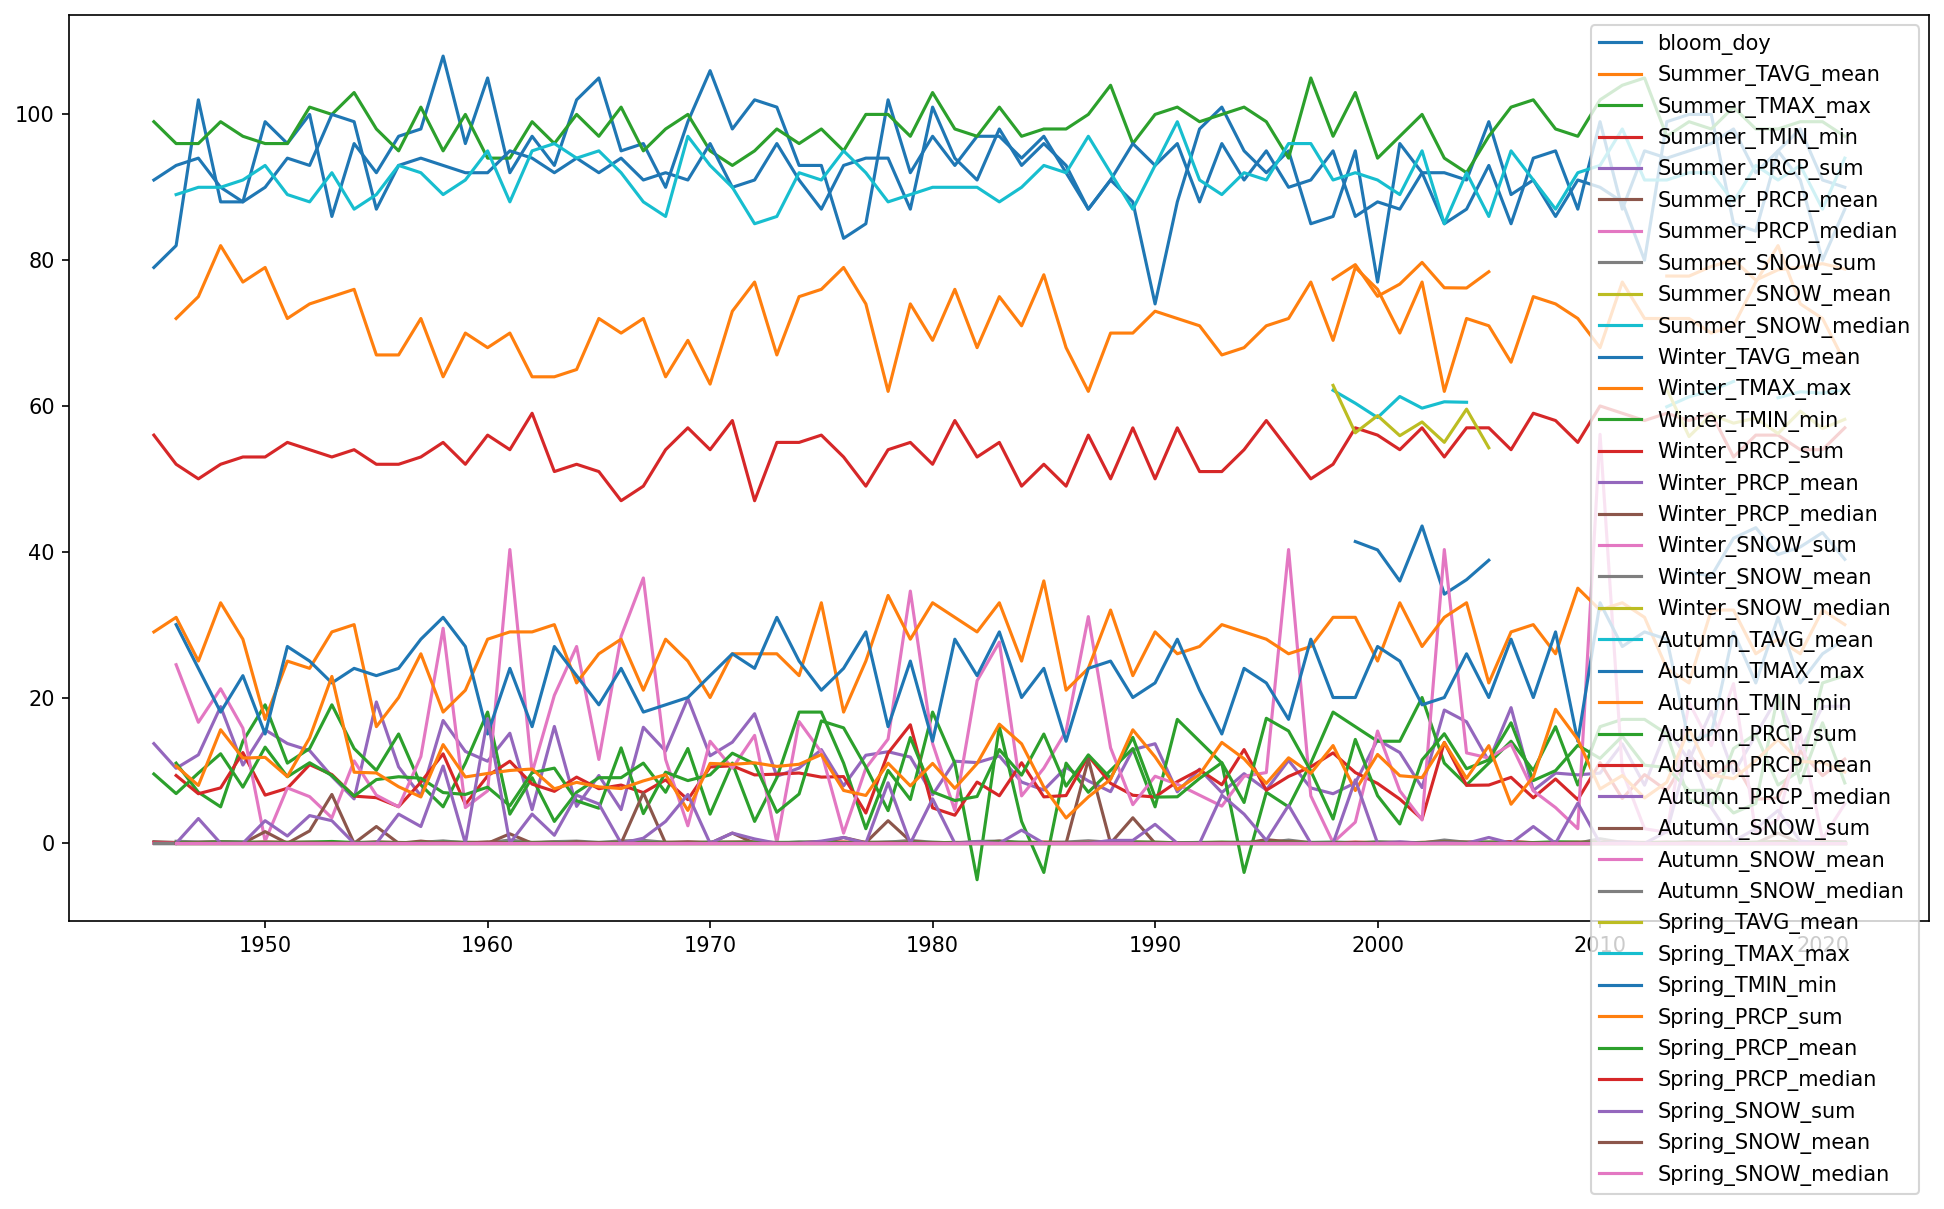

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(wdc_processed_df)
plt.gca().legend(tuple(wdc_processed_df.columns), loc='upper right')
plt.show()

In [42]:
wdc_processed_df.shape

(77, 37)

In [43]:
wdc_processed_df.head()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Summer_PRCP_mean,Summer_PRCP_median,Summer_SNOW_sum,Summer_SNOW_mean,Summer_SNOW_median,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_PRCP_mean,Winter_PRCP_median,Winter_SNOW_sum,Winter_SNOW_mean,Winter_SNOW_median,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_PRCP_mean,Autumn_PRCP_median,Autumn_SNOW_sum,Autumn_SNOW_mean,Autumn_SNOW_median,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_PRCP_mean,Spring_PRCP_median,Spring_SNOW_sum,Spring_SNOW_mean,Spring_SNOW_median
1945,79.0,NaN,99.0,56.0,13.68,0.220645,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,29.0,9.51,0.104505,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946,82.0,NaN,96.0,52.0,10.29,0.111848,0.0,0.0,0.0,0.0,NaN,72.0,11.0,9.30,0.103333,0.0,24.5,0.275281,0.0,NaN,93.0,31.0,6.82,0.074945,0.0,0.0,0.0,0.0,NaN,89.0,30.0,10.59,0.115109,0.0,0.0,0.000000,0.0
1947,102.0,NaN,96.0,50.0,12.14,0.131957,0.0,0.0,0.0,0.0,NaN,75.0,7.0,6.80,0.075556,0.0,16.6,0.184444,0.0,NaN,94.0,25.0,9.63,0.105824,0.0,0.0,0.0,0.0,NaN,90.0,24.0,7.94,0.086304,0.0,3.4,0.036957,0.0
1948,88.0,NaN,99.0,52.0,18.75,0.203804,0.0,0.0,0.0,0.0,NaN,82.0,5.0,7.60,0.083516,0.0,21.2,0.232967,0.0,NaN,90.0,33.0,12.28,0.134945,0.0,0.0,0.0,0.0,NaN,90.0,18.0,15.58,0.169348,0.0,0.0,0.000000,0.0
1949,88.0,NaN,97.0,53.0,10.73,0.116630,0.0,0.0,0.0,0.0,NaN,77.0,14.0,12.45,0.138333,0.0,15.8,0.175556,0.0,NaN,88.0,28.0,7.70,0.084615,0.0,0.0,0.0,0.0,NaN,91.0,23.0,11.69,0.127065,0.0,0.0,0.000000,0.0


In [44]:
# removes low variance columns
from sklearn.feature_selection import VarianceThreshold

wdc_imputed_df = wdc_processed_df.copy()

var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(wdc_imputed_df)

concol = [column for column in wdc_imputed_df.columns 
          if column not in wdc_imputed_df.columns[var_thr.get_support()]]

# for item in ["Summer_TAVG_mean", "Winter_TAVG_mean", "Autumn_TAVG_mean", "Spring_TAVG_mean"]:
#   concol.append(item)

wdc_imputed_df = wdc_imputed_df.drop(concol, axis=1)

print(concol)

['Summer_PRCP_mean', 'Summer_PRCP_median', 'Summer_SNOW_sum', 'Summer_SNOW_mean', 'Summer_SNOW_median', 'Winter_PRCP_mean', 'Winter_PRCP_median', 'Winter_SNOW_mean', 'Winter_SNOW_median', 'Autumn_PRCP_mean', 'Autumn_PRCP_median', 'Autumn_SNOW_mean', 'Autumn_SNOW_median', 'Spring_PRCP_mean', 'Spring_PRCP_median', 'Spring_SNOW_mean', 'Spring_SNOW_median']


In [45]:
# from sklearn.impute import KNNImputer

# wdc_imputed_df = wdc_processed_df.copy()

# # knn imputation
# for column in wdc_imputed_df.columns:
#   knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
#   wdc_imputed_df[column] = knn_imputer.fit_transform(wdc_imputed_df[[column]])

# # converts the index as date
# wdc_imputed_df.index = pd.to_datetime(wdc_imputed_df.index, format="%Y")

from sklearn.impute import KNNImputer

# knn imputation
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
wdc_imputed_df = pd.DataFrame(knn_imputer.fit_transform(wdc_imputed_df), columns = wdc_imputed_df.columns)

In [46]:
wdc_imputed_df.head()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_SNOW_sum,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_SNOW_sum,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_SNOW_sum
0,79.0,77.277295,99.0,56.0,13.68,42.059707,75.0,13.333333,7.85,13.766667,60.798535,91.0,29.0,9.51,0.0,57.978261,91.0,26.333333,11.38,0.666667
1,82.0,78.039855,96.0,52.0,10.29,40.921815,72.0,11.000000,9.30,24.500000,61.238095,93.0,31.0,6.82,0.0,58.532609,89.0,30.000000,10.59,0.000000
2,102.0,78.863527,96.0,50.0,12.14,38.714815,75.0,7.000000,6.80,16.600000,61.520147,94.0,25.0,9.63,0.0,57.449275,90.0,24.000000,7.94,3.400000
3,88.0,76.753623,99.0,52.0,18.75,39.024379,82.0,5.000000,7.60,21.200000,60.285714,90.0,33.0,12.28,0.0,59.173913,90.0,18.000000,15.58,0.000000
4,88.0,76.753623,97.0,53.0,10.73,39.024379,77.0,14.000000,12.45,15.800000,60.285714,88.0,28.0,7.70,0.0,59.173913,91.0,23.000000,11.69,0.000000


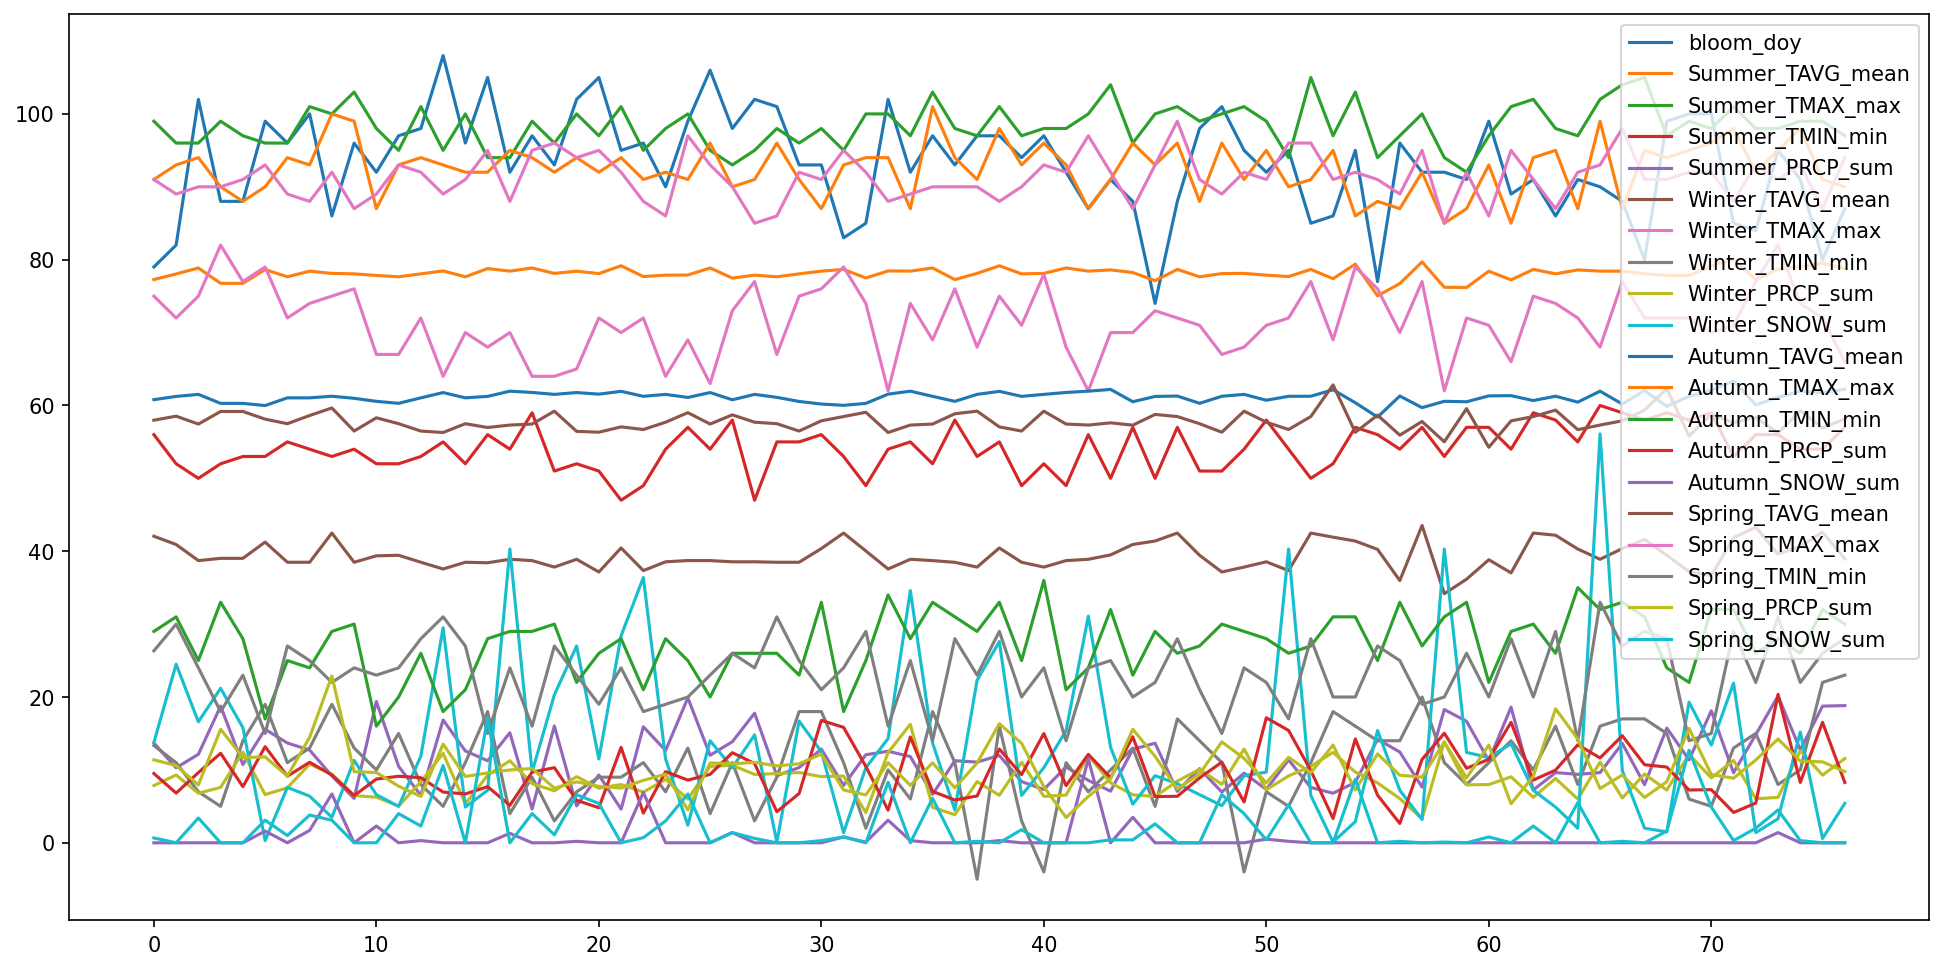

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(wdc_imputed_df)
plt.gca().legend(tuple(wdc_imputed_df.columns), loc='upper right')
plt.show()

In [48]:
wdc_imputed_df.tail()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_SNOW_sum,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_SNOW_sum,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_SNOW_sum
72,84.0,77.266667,98.0,56.0,14.86,43.300000,77.0,15.0,6.04,1.4,60.086813,92.0,26.0,5.45,0.0,58.347826,93.0,22.0,11.36,2.0
73,95.0,78.684783,98.0,56.0,20.13,39.610169,82.0,8.0,6.23,3.3,61.120879,95.0,28.0,20.36,1.4,56.217391,91.0,31.0,14.24,4.5
74,91.0,79.032609,99.0,54.0,12.75,40.655556,74.0,10.0,12.64,15.2,61.945055,98.0,26.0,8.28,0.0,59.282609,93.0,22.0,11.21,0.3
75,80.0,79.521739,99.0,54.0,18.75,42.626374,72.0,22.0,9.28,0.6,61.758242,91.0,32.0,16.53,0.0,56.913043,87.0,26.0,11.10,0.0
76,87.0,78.793478,97.0,57.0,18.82,38.955556,66.0,23.0,11.55,5.4,62.230769,90.0,30.0,8.28,0.0,58.163043,94.0,28.0,9.77,0.0


In [49]:
train = wdc_imputed_df[:int(0.1*(len(wdc_imputed_df)))]
valid = wdc_imputed_df[int(0.1*(len(wdc_imputed_df))):]

In [50]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[wdc_imputed_df.columns])

for j in range(0,len(wdc_imputed_df.columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in wdc_imputed_df.columns:
    print('MAE value for', i, 'is : ', sqrt(mean_absolute_error(pred[i], valid[i])))

In [52]:
# make final predictions
model = VAR(endog=wdc_imputed_df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=10)
print(yhat)

[[ 8.73898395e+01  7.96176366e+01  9.97966726e+01  5.76253629e+01
   1.01744927e+01  4.31634562e+01  7.31782287e+01  1.92006743e+01
   8.88212428e+00  2.86896490e+00  6.12673337e+01  9.19780713e+01
   3.08488765e+01  1.34909726e+01 -7.98693658e-02  5.81542033e+01
   9.34943857e+01  2.45324586e+01  8.08638607e+00 -8.18888359e-02]
 [ 8.64050651e+01  7.78828577e+01  9.73033317e+01  5.44098369e+01
   1.36544878e+01  4.01875647e+01  7.19221643e+01  1.44559359e+01
   1.00582831e+01  1.69932841e+01  6.09215395e+01  9.10773945e+01
   2.74886448e+01  1.25591205e+01  2.07732226e-02  5.78123469e+01
   9.08835735e+01  2.66000429e+01  1.02588020e+01  8.71543955e-02]
 [ 9.17450255e+01  7.79326739e+01  9.81114497e+01  5.44693684e+01
   1.25828846e+01  3.94878534e+01  7.28263840e+01  1.27443030e+01
   8.27026778e+00  8.56604972e+00  6.08652426e+01  9.11054409e+01
   2.79913314e+01  9.83545796e+00  3.98222844e-01  5.79652213e+01
   9.21349242e+01  2.36602226e+01  9.66806888e+00  2.00078933e+00]
 [ 9.30

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
